In [65]:
import act
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv(r'C:\Users\chesh\Desktop\Cape K workshop\Workshop Project\kcgmawsM1.csv',
                 index_col=0)

In [71]:
df.head()

,base_time,time_offset,atmospheric_pressure,qc_atmospheric_pressure,atmospheric_temperature,qc_atmospheric_temperature,atmospheric_relative_humidity,qc_atmospheric_relative_humidity,atmospheric_dew_point,qc_atmospheric_dew_point,wind_speed,qc_wind_speed,wind_direction,qc_wind_direction,lat,lon,alt
time,,,,,,,,,,,,,,,,,
15/04/2024 0:00,15/04/2024,15/04/2024 0:00,1011.3,0,NaN,0,71.0,0,10.7,0,10.7,0,250.0,0,-40.68078,144.68983,80
15/04/2024 0:01,15/04/2024,15/04/2024 0:01,1011.3,0,NaN,0,70.0,0,10.4,0,10.0,0,251.0,0,-40.68078,144.68983,80
15/04/2024 0:02,15/04/2024,15/04/2024 0:02,1011.3,0,NaN,0,70.0,0,10.3,0,10.1,0,252.0,0,-40.68078,144.68983,80
15/04/2024 0:03,15/04/2024,15/04/2024 0:03,1011.3,0,NaN,0,70.0,0,10.4,0,10.5,0,247.0,0,-40.68078,144.68983,80
15/04/2024 0:04,15/04/2024,15/04/2024 0:04,1011.3,0,NaN,0,69.0,0,10.3,0,10.8,0,247.0,0,-40.68078,144.68983,80


In [73]:
df.columns

Index(['base_time', 'time_offset', 'atmospheric_pressure',
       'qc_atmospheric_pressure', 'atmospheric_temperature',
       'qc_atmospheric_temperature', 'atmospheric_relative_humidity',
       'qc_atmospheric_relative_humidity', 'atmospheric_dew_point',
       'qc_atmospheric_dew_point', 'wind_speed', 'qc_wind_speed',
       'wind_direction', 'qc_wind_direction', 'lat', 'lon', 'alt'],
      dtype='object')

In [63]:
df.describe()

,atmos_pressure,qc_atmos_pressure,temp_mean,qc_temp_mean,temp_std,rh_mean,qc_rh_mean,rh_std,vapor_pressure_mean,qc_vapor_pressure_mean,...,qc_pwd_cumul_rain,pwd_cumul_snow,qc_pwd_cumul_snow,logger_volt,qc_logger_volt,logger_temp,qc_logger_temp,lat,lon,alt
count,424772.000000,424772.000000,424770.000000,424772.000000,424769.000000,424772.000000,424772.000000,424772.000000,424770.000000,424772.00000,...,424772.000000,386258.000000,424772.000000,424772.000000,424772.0,424772.000000,424772.0,4.247720e+05,4.247720e+05,424772.0
mean,100.646081,0.000217,12.566942,0.000071,0.062380,77.803766,0.004854,0.492947,1.155598,0.00323,...,0.090639,0.005693,0.090679,13.254958,0.0,14.416222,0.0,-4.068078e+01,1.446898e+02,80.0
std,1.429458,0.020812,3.550844,0.022235,0.165804,16.880338,0.163146,1.116689,0.352860,0.09628,...,0.287784,3.230267,0.287202,0.097213,0.0,4.016903,0.0,3.734049e-10,7.249818e-10,0.0
min,0.000000,0.000000,-26.590000,0.000000,0.000000,-65.630000,0.000000,0.000000,-0.141000,0.00000,...,0.000000,0.000000,0.000000,12.430000,0.0,3.566000,0.0,-4.068078e+01,1.446898e+02,80.0
25%,100.040000,0.000000,10.880000,0.000000,0.046000,71.350000,0.000000,0.224000,0.960000,0.00000,...,0.000000,0.000000,0.000000,13.200000,0.0,11.890000,0.0,-4.068078e+01,1.446898e+02,80.0
50%,100.670000,0.000000,12.410000,0.000000,0.056000,79.470000,0.000000,0.273000,1.149000,0.00000,...,0.000000,0.000000,0.000000,13.260000,0.0,13.960000,0.0,-4.068078e+01,1.446898e+02,80.0
75%,101.320000,0.000000,14.160000,0.000000,0.071000,88.900000,0.000000,0.426000,1.360000,0.00000,...,0.000000,0.000000,0.000000,13.310000,0.0,16.660000,0.0,-4.068078e+01,1.446898e+02,80.0
max,103.200000,2.000000,1381.000000,8.000000,105.800000,204.200000,8.000000,145.200000,2.301000,8.00000,...,8.000000,2005.000000,4.000000,13.550000,0.0,30.590000,0.0,-4.068078e+01,1.446898e+02,80.0


In [75]:
df.index = pd.to_datetime(df.index)

C:\Users\chesh\AppData\Local\Temp\ipykernel_23164\3150677299.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.index = pd.to_datetime(df.index)


In [87]:
#df_hour = df[['wind_speed','wind_direction']]
#df_hour = df_hour.resample('1h').mean()
#df_hour.to_csv('wind_speed_hourly.csv')

In [103]:
ds = df.to_xarray()

C:\Users\chesh\anaconda3\Lib\site-packages\act\plotting\plot.py:81: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  warnings.warn(


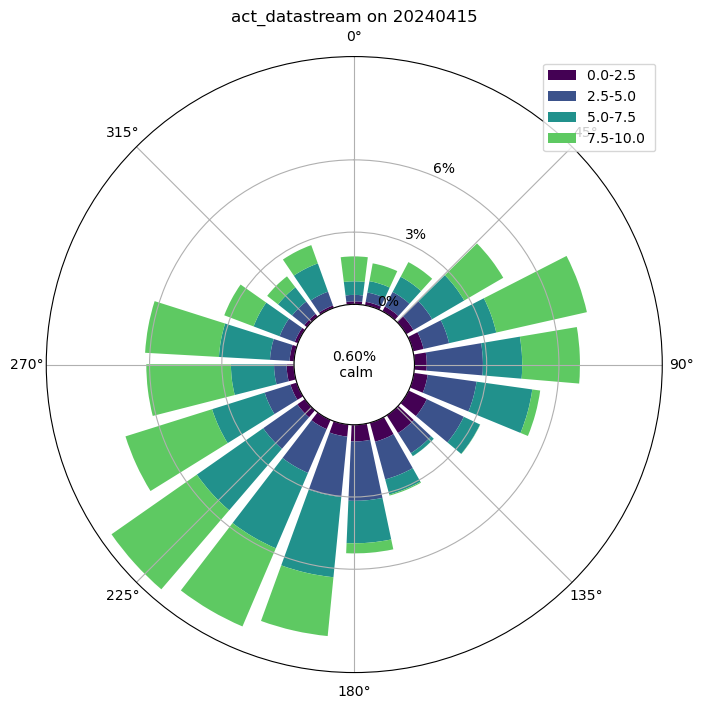

In [136]:
# Now we can plot up a wind rose of that entire month's worth of data
windrose = act.plotting.WindRoseDisplay(ds, figsize=(10,8))
windrose.plot("wind_direction", "wind_speed", spd_bins=np.linspace(0, 10, 5))
windrose.axes[0].legend()
plt.savefig('total wind rose')
plt.show();

In [107]:
ds_sept = ds.sel(time=slice('2024-09-18', '2024-09-21'))

C:\Users\chesh\anaconda3\Lib\site-packages\act\plotting\plot.py:81: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  warnings.warn(


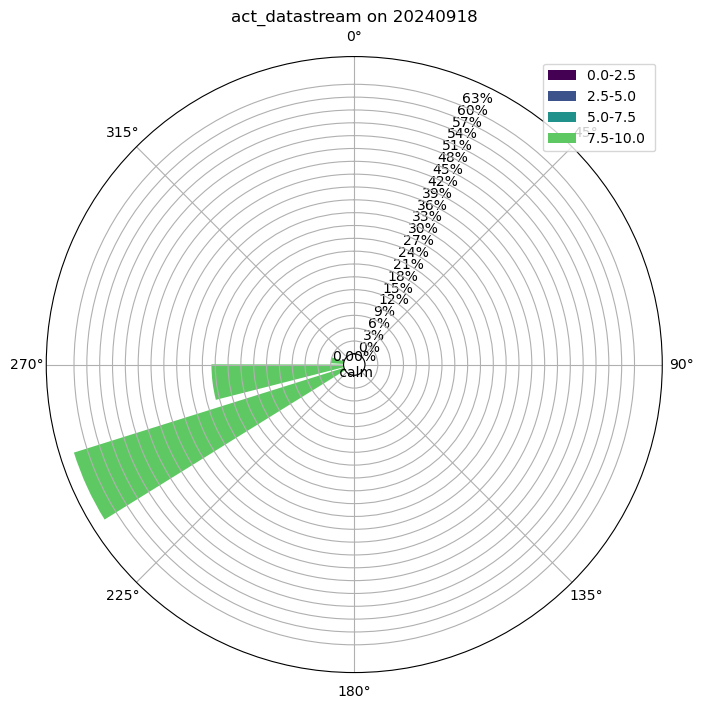

In [138]:
# Now we can plot up a wind rose of that entire month's worth of data
windrose = act.plotting.WindRoseDisplay(ds_sept, figsize=(10,8))
windrose.plot("wind_direction", "wind_speed", spd_bins=np.linspace(0, 10, 5))
windrose.axes[0].legend()
plt.savefig('September wind rose')
plt.show();

In [148]:
ds_june = ds.sel(time=slice('2024-06-10', '2024-06-14'))

C:\Users\chesh\anaconda3\Lib\site-packages\act\plotting\plot.py:81: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  warnings.warn(


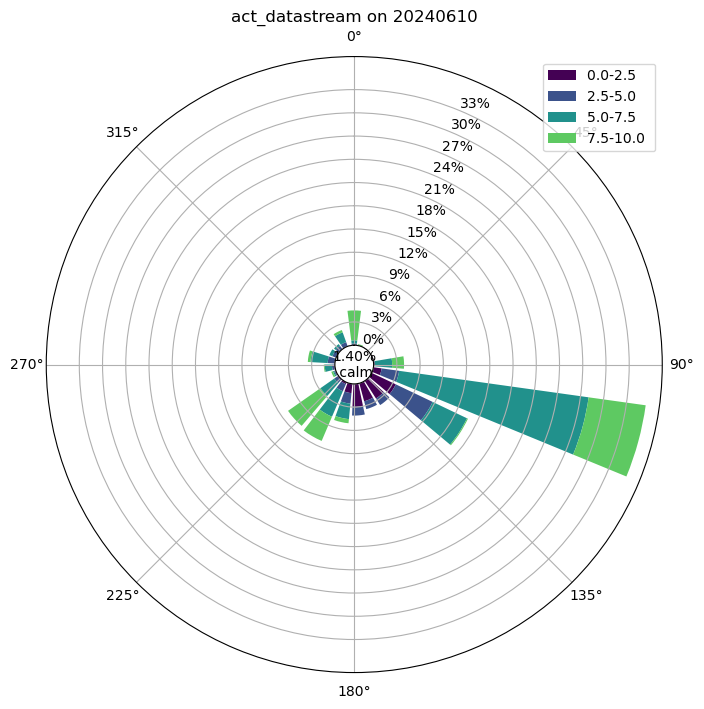

In [150]:
# Now we can plot up a wind rose of that entire month's worth of data
windrose = act.plotting.WindRoseDisplay(ds_june, figsize=(10,8))
windrose.plot("wind_direction", "wind_speed", spd_bins=np.linspace(0, 10, 5))
windrose.axes[0].legend()
plt.savefig('June wind rose')
plt.show();

In [130]:
ds_june = ds.sel(time=slice('2024-06-12', '2024-06-12'))

C:\Users\chesh\anaconda3\Lib\site-packages\act\plotting\plot.py:81: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  warnings.warn(


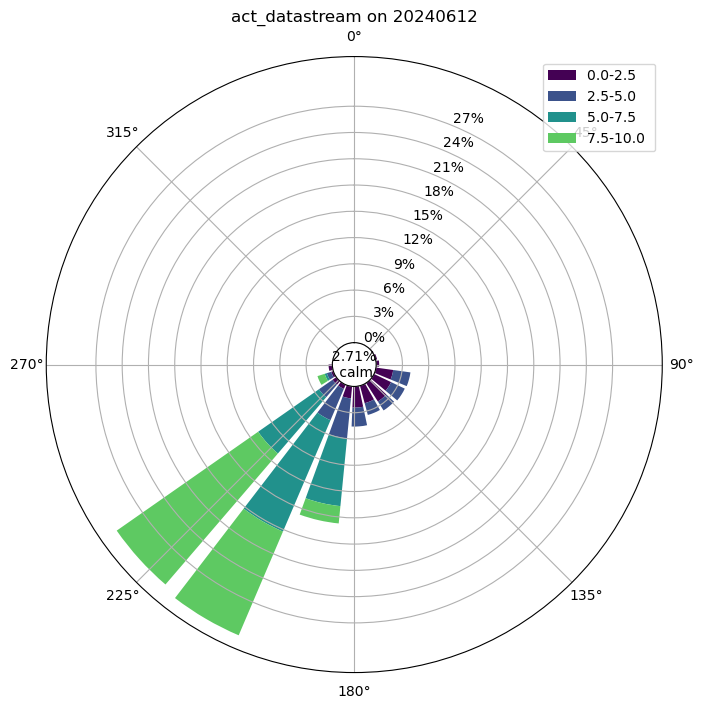

In [142]:
# Now we can plot up a wind rose of that entire month's worth of data
windrose = act.plotting.WindRoseDisplay(ds_june, figsize=(10,8))
windrose.plot("wind_direction", "wind_speed", spd_bins=np.linspace(0, 10, 5))
windrose.axes[0].legend()
plt.savefig('june subset wind rose')
plt.show();

In [152]:
ds_june = ds.sel(time=slice('2024-06-11', '2024-06-11'))

C:\Users\chesh\anaconda3\Lib\site-packages\act\plotting\plot.py:81: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  warnings.warn(


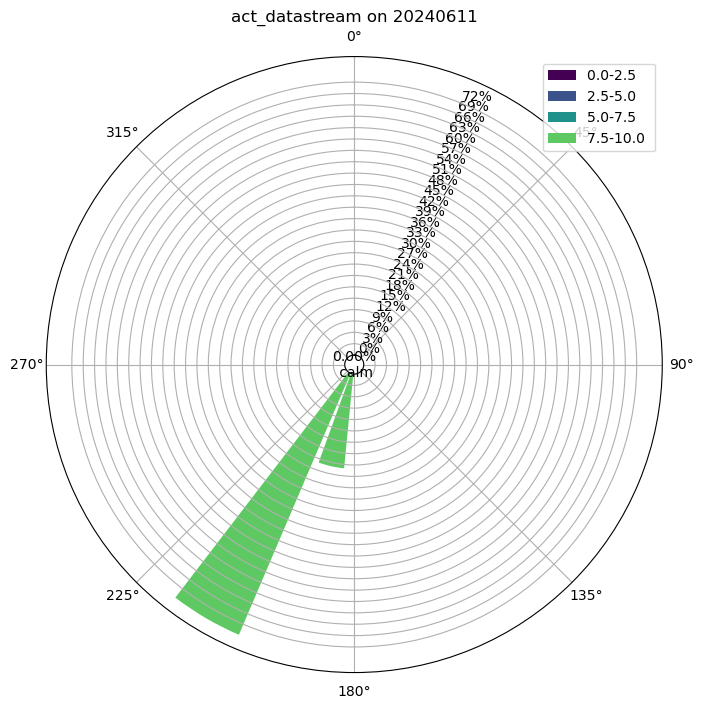

In [153]:
# Now we can plot up a wind rose of that entire month's worth of data
windrose = act.plotting.WindRoseDisplay(ds_june, figsize=(10,8))
windrose.plot("wind_direction", "wind_speed", spd_bins=np.linspace(0, 10, 5))
windrose.axes[0].legend()
plt.savefig('june subset wind rose')
plt.show();

In [118]:
ds_oct = ds.sel(time=slice('2024-10-6', '2024-10-8'))

C:\Users\chesh\anaconda3\Lib\site-packages\act\plotting\plot.py:81: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  warnings.warn(


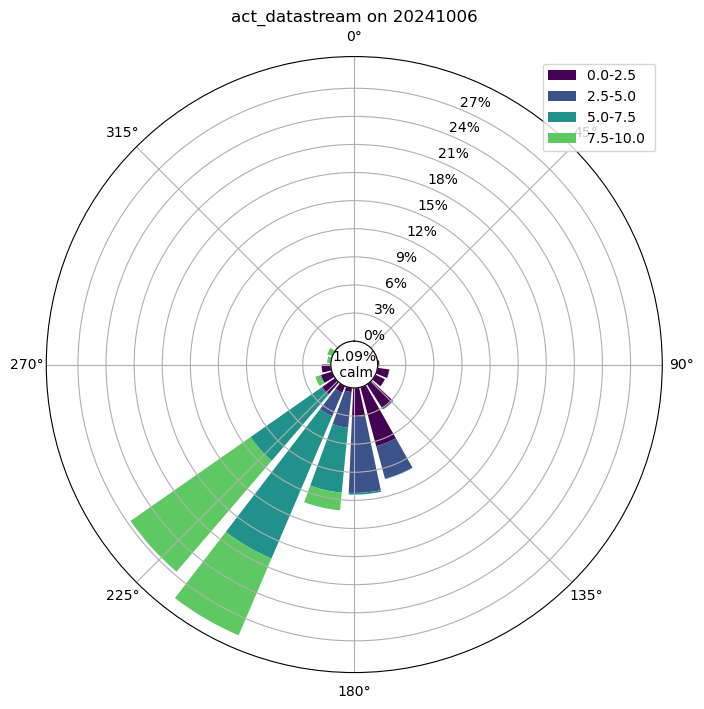

In [144]:

windrose = act.plotting.WindRoseDisplay(ds_oct, figsize=(10,8))
windrose.plot("wind_direction", "wind_speed", spd_bins=np.linspace(0, 10, 5))
windrose.axes[0].legend()
plt.savefig('October wind rose')
plt.show();

In [122]:
ds_dec = ds.sel(time=slice('2024-12-10', '2024-12-12'))


C:\Users\chesh\anaconda3\Lib\site-packages\act\plotting\plot.py:81: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  warnings.warn(


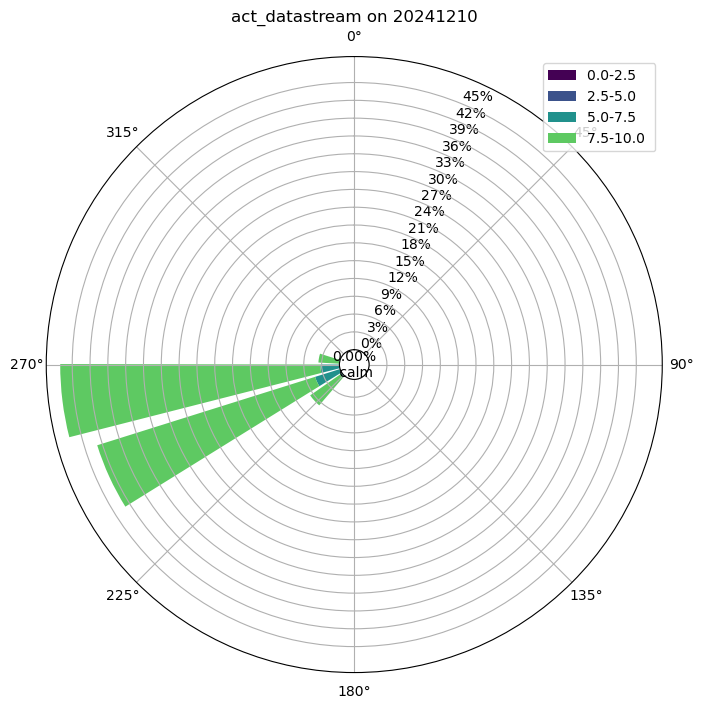

In [146]:

windrose = act.plotting.WindRoseDisplay(ds_dec, figsize=(10,8))
windrose.plot("wind_direction", "wind_speed", spd_bins=np.linspace(0, 10, 5))
windrose.axes[0].legend()
plt.savefig('December wind rose')
plt.show();